# Import Libraries

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] =(12,8)

# Importing Data set and Visualising it

In [2]:
dataset = pd.read_csv('G:/Jupyter Sketch/Regression/Data/food_truck_data.csv')
dataset.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0.5, 1.0, 'Profit in $10000 vs Population in 10000')

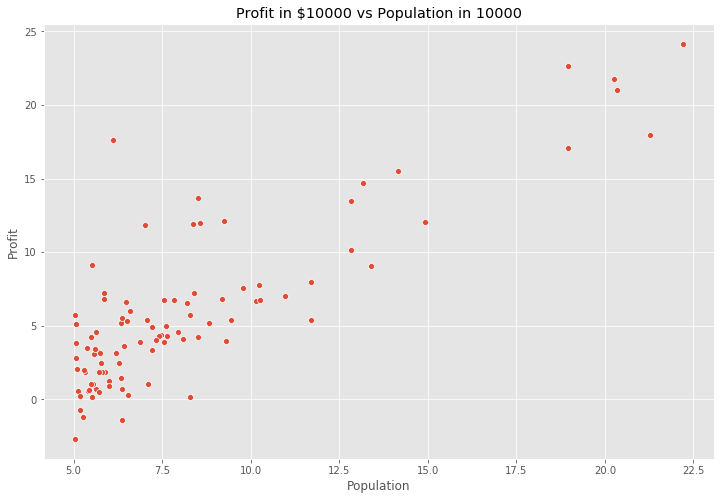

In [4]:
graph = sns.scatterplot(x="Population", y="Profit", data = dataset)
graph.set_title("Profit in $10000 vs Population in 10000")

# Calculating the Cost Function

###### The objective is to reduce the Cost function J(θ)
###### -> θj : Weights of the hypothesis.
###### -> hθ(xi) : predicted y value for ith input.
###### ->j : Feature index number (can be 0, 1, 2, ......, n).
###### ->α : Learning Rate of Gradient Descent
######  J(θ) = 1/(2*m) * Σ i=1 to m (hθ(xi) - yi)^2


In [5]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y)**2
    return (1/2*m)*np.sum(error) 

In [6]:
m = dataset.Population.values.size
X = np.append(np.ones((m, 1)), dataset.Population.values.reshape(m,1), axis =1)
y = dataset.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(X, y, theta)

301772.35305298044

#   Gradient Descent 

###### Minimise the cost Function J(θ)   
###### Updating the equation and repeating until convergence
###### θj = θj - α/(*m) * Σ i=1 to m (hθ(xi) - yi)*xj
###### Simultaneously update θj for all j

In [7]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs=[]
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(),(y_pred-y))
        theta-= alpha*1/m*error
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [8]:
theta, costs = gradient_descent(X, y, theta, alpha = 0.01, iterations = 2000)
print("h(x) = {} +{}x1".format(str(round(theta[0,0],2)), str(round(theta[1,0],2))))

h(x) = -3.79 +1.18x1


## Visualising the cost function J(θ)

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)
cost_values = np.zeros((len(theta_0), len(theta_1)))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

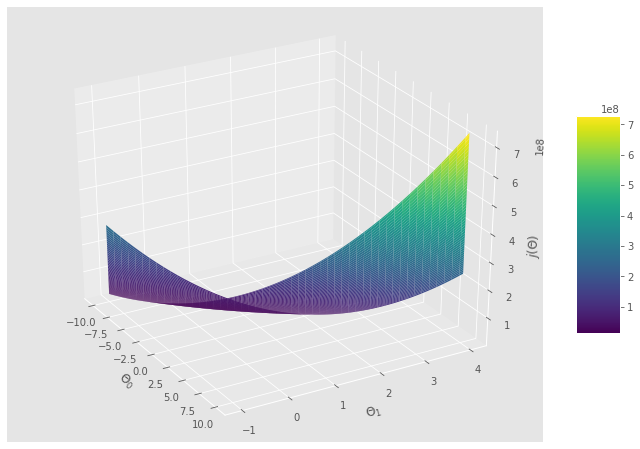

In [11]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$j(\Theta)$')
ax.view_init(30, 330)
plt.show()

## Plotting the Convergence

Text(0.5, 1.0, 'No. of Iterations vs Cost Function of the Gradient Descent')

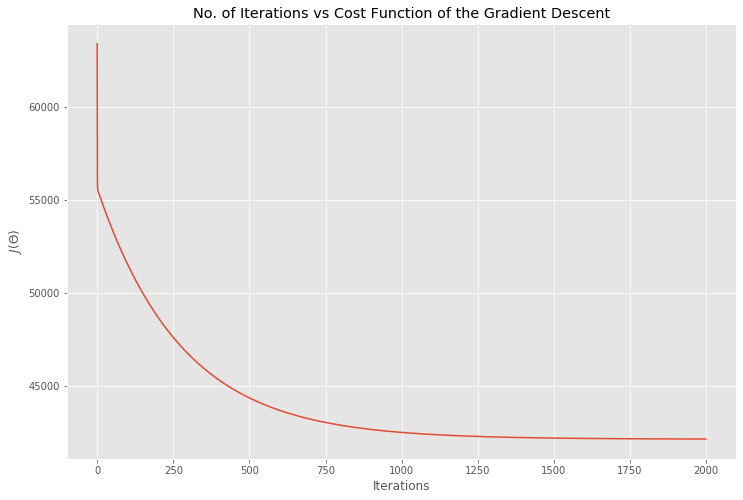

In [12]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel('$J(\Theta)$')
plt.title("No. of Iterations vs Cost Function of the Gradient Descent")


## Training Data with Linear Regression Fit

In [14]:
theta.shape

(2, 1)

In [15]:
theta

array([[-3.78806857],
       [ 1.18221277]])

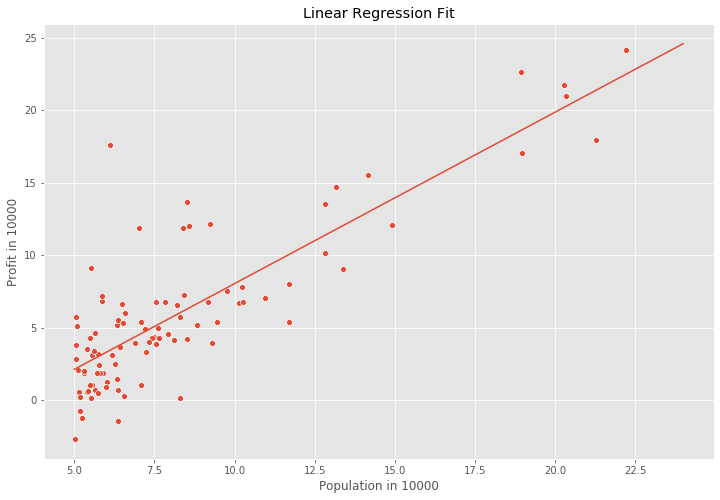

In [17]:
theta = np.squeeze(theta)
ax = sns.scatterplot(x = 'Population', y = 'Profit', data = dataset)
x_value = [x for x in range(5,25)]
y_value = [(x*theta[1]+ theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)
plt.xlabel("Population in 10000")
plt.ylabel("Profit in 10000")
plt.title("Linear Regression Fit");


## Inference using the optimised θ Values

###### hθ(x) = (θTranspose)X

In [18]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred


In [24]:
y_pred1 = predict(np.array([1,4]), theta) * 10000
print("For a population of 40000 people, the model perdicts a profit of $"+ str(round(y_pred1,0)))

For a population of 40000 people, the model perdicts a profit of $9408.0


In [25]:
y_pred2 = predict(np.array([1,2]), theta) * 1000
print("For a population of 2000 people, the model perdicts a profit of $"+ str(round(y_pred2,0)))

For a population of 2000 people, the model perdicts a profit of $-1424.0


In [26]:
y_pred3 = predict(np.array([1,8.4]), theta) * 10000
print("For a population of 84000 people, the model perdicts a profit of $"+ str(round(y_pred3,0)))

For a population of 84000 people, the model perdicts a profit of $61425.0
